In [0]:
from sklearn.datasets import fetch_lfw_people

In [2]:
lfw_dataset = fetch_lfw_people(min_faces_per_person=100)

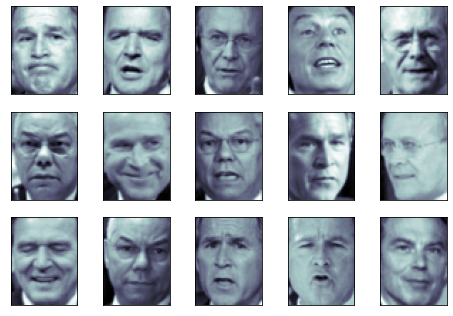

In [3]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(8, 5.5))

for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.imshow(lfw_dataset.images[i], cmap=plt.cm.bone)

In [0]:
X = lfw_dataset.data
Y = lfw_dataset.target

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components=100)

In [0]:
data = lfw_dataset.data
print(data.shape)

data = StandardScaler().fit_transform(data)

new = pca.fit_transform(data)
print(new.shape)

(1140, 2914)
(1140, 100)


In [0]:
for name in lfw_dataset.target_names:
    print(name)

Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Tony Blair


In [0]:
digitDict = {}
for i in range(5):
    mask = (lfw_dataset.target == i)
    digitDict[i] = new[mask]

for i in range(5):
    print("Personality {0} matrix shape: {1}".format(i,digitDict[i].shape))

Personality 0 matrix shape: (236, 100)
Personality 1 matrix shape: (121, 100)
Personality 2 matrix shape: (530, 100)
Personality 3 matrix shape: (109, 100)
Personality 4 matrix shape: (144, 100)


In [0]:
from sklearn.manifold import TSNE

class0 = TSNE(n_components=2).fit_transform(digitDict[1])
class1 = TSNE(n_components=2).fit_transform(digitDict[3])
class2 = TSNE(n_components=2).fit_transform(digitDict[4])

In [0]:
class0.shape

(121, 2)

In [0]:
label = [lfw_dataset.target_names[1]]*121
label1 = [lfw_dataset.target_names[3]]*109
label2 = [lfw_dataset.target_names[4]]*144
label = label + label1 + label2
print(len(label))

374


In [0]:
import pandas as pd

In [0]:
df = pd.DataFrame(class0, columns=['component1', 'component2'])
df2 = pd.DataFrame(class1, columns=['component1', 'component2'])
df3 = pd.DataFrame(class2, columns=['component1', 'component2'])
df

,component1,component2
0,7.559570,0.026518
1,7.003946,-10.670027
2,-8.327526,13.894648
3,5.801883,-8.960138
4,5.309047,-1.676409
...,...,...
116,-10.525619,-5.222887
117,-10.848630,4.227121
118,13.697411,0.577082
119,6.299471,-5.501401


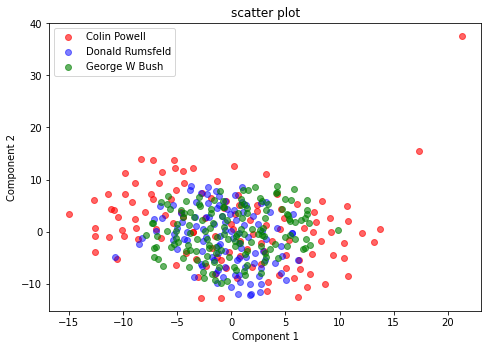

In [0]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['component1'], df['component2'], color='r',alpha=0.6, label='Colin Powell')
ax.scatter(df2['component1'], df2['component2'], color='b',alpha=0.5, label='Donald Rumsfeld')
ax.scatter(df3['component1'], df3['component2'], color='g',alpha=0.6, label='George W Bush')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_title('scatter plot')
ax.legend()
plt.show()

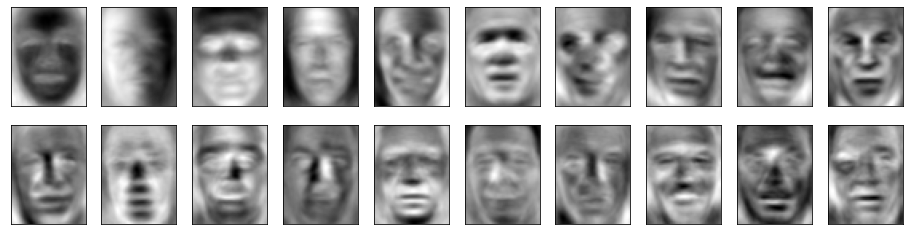

In [0]:
fig = plt.figure(figsize=(16, 4))
for i in range(20):
    ax = fig.add_subplot(2, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(lfw_dataset.images[0].shape), cmap='gray')

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 10)
# Fit the classifier to the data
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)

0.631578947368421

In [0]:
y_pred = knn.predict(X_test)

In [0]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred, target_names=lfw_dataset.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.64      0.76      0.69        78
  Donald Rumsfeld       0.57      0.21      0.31        38
    George W Bush       0.64      0.87      0.74       159
Gerhard Schroeder       0.50      0.07      0.12        30
       Tony Blair       0.53      0.22      0.31        37

         accuracy                           0.63       342
        macro avg       0.58      0.42      0.43       342
     weighted avg       0.61      0.63      0.58       342



In [0]:
pca.components_.shape

(100, 2914)

In [0]:
lfw_dataset.images[0].shape

(62, 47)

In [0]:
pca.explained_variance_ratio_

array([0.23004547, 0.1618032 , 0.07093795, 0.05204202, 0.03511062,
       0.0285161 , 0.02095177, 0.01821129, 0.01657457, 0.01615416,
       0.01371602, 0.0133087 , 0.01171934, 0.0103077 , 0.00955637,
       0.00901088, 0.0088486 , 0.00749774, 0.00653919, 0.00642286,
       0.00617503, 0.00592537, 0.00548132, 0.00532305, 0.00488741,
       0.00466708, 0.00447667, 0.00432551, 0.00401533, 0.00382645,
       0.00365675, 0.00355487, 0.00346539, 0.00333566, 0.00318316,
       0.0030886 , 0.00298624, 0.00284061, 0.00274173, 0.00267179,
       0.00263401, 0.00257413, 0.00253556, 0.0024803 , 0.00244659,
       0.0023241 , 0.00225057, 0.00220743, 0.00214591, 0.00209419,
       0.00206413, 0.00201433, 0.00194599, 0.00193763, 0.00190834,
       0.00186796, 0.00180821, 0.00171573, 0.00169295, 0.00167198,
       0.00165432, 0.00159275, 0.00156135, 0.00152869, 0.00148211,
       0.00146114, 0.00143194, 0.00141583, 0.00141024, 0.00137235,
       0.00137182, 0.00135709, 0.00131187, 0.00128736, 0.00127

In [0]:
sum = 0
count = 0
for i in pca.explained_variance_ratio_:
    if sum <= 0.80 :
        sum += i
        count += 1

In [0]:
print(count)

31


In [0]:
print(sum)

0.8000344834290445


In [0]:
new_data = new[:, 0:31]
new_data.shape

(1140, 31)

In [0]:
knn2 = KNeighborsClassifier(n_neighbors = 10)
knn2.fit(X_train[:, 0:31], y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')

In [0]:
knn2.score(X_test[:, 0:31], y_test)

0.5321637426900585

In [0]:
y_pred = knn2.predict(X_test[:, 0:31])
print(classification_report(y_test, y_pred, target_names=lfw_dataset.target_names))

                   precision    recall  f1-score   support

     Colin Powell       0.49      0.51      0.50        78
  Donald Rumsfeld       0.44      0.21      0.29        38
    George W Bush       0.58      0.77      0.66       159
Gerhard Schroeder       0.39      0.23      0.29        30
       Tony Blair       0.31      0.11      0.16        37

         accuracy                           0.53       342
        macro avg       0.44      0.37      0.38       342
     weighted avg       0.50      0.53      0.50       342

